<a href="https://colab.research.google.com/github/SiddhiNKabra/LP-5/blob/main/dl4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# load the dataset
df = pd.read_csv('google_stock_price_train.csv', thousands=',')

In [2]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

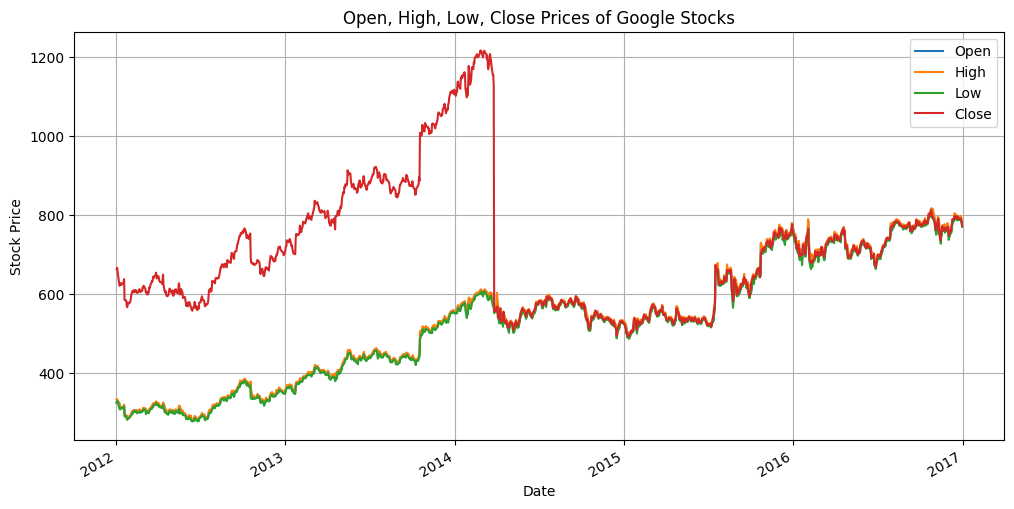

In [5]:
fig = df.plot(
    x="Date",
    y=["Open", "High", "Low", "Close"],
    figsize=(12, 6),
    title='Open, High, Low, Close Prices of Google Stocks'
)
fig.set_ylabel("Stock Price")
fig.set_xlabel("Date")
plt.grid(True)
plt.show()

In [6]:
data = df.drop('Date', axis=1)

In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [8]:
def create_sequences(data, target_col_index, seq_len=60):
    x, y = [], []
    for i in range(seq_len, len(data)):
        x.append(data[i-seq_len:i])            # shape: (60, num_features)
        y.append(data[i, target_col_index])    # only close price
    return np.array(x), np.array(y)


x, y = create_sequences(scaled_data, target_col_index=3)

In [9]:
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [10]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)  # predicts a single value i.e. close price
])

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,009 (199.25 KB)

 Trainable params: 51,009 (199.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0546 - val_loss: 0.0011
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0079 - val_loss: 0.0020
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0078 - val_loss: 7.4939e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - val_loss: 7.7506e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0050 - val_loss: 4.8412e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0051 - val_loss: 0.0011
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0040 - val_loss: 6.7855e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0048 - val_loss: 6.3477e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1

In [12]:
y_pred = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [13]:
close_scaler = MinMaxScaler()

# copy over the min_ and scale_ values for the Close column from the original scaler (index 3)
close_scaler.min_, close_scaler.scale_ = scaler.min_[3:4], scaler.scale_[3:4]


In [14]:
predicted_values = close_scaler.inverse_transform(y_pred)
actual_values = close_scaler.inverse_transform(y_test.reshape(-1, 1))

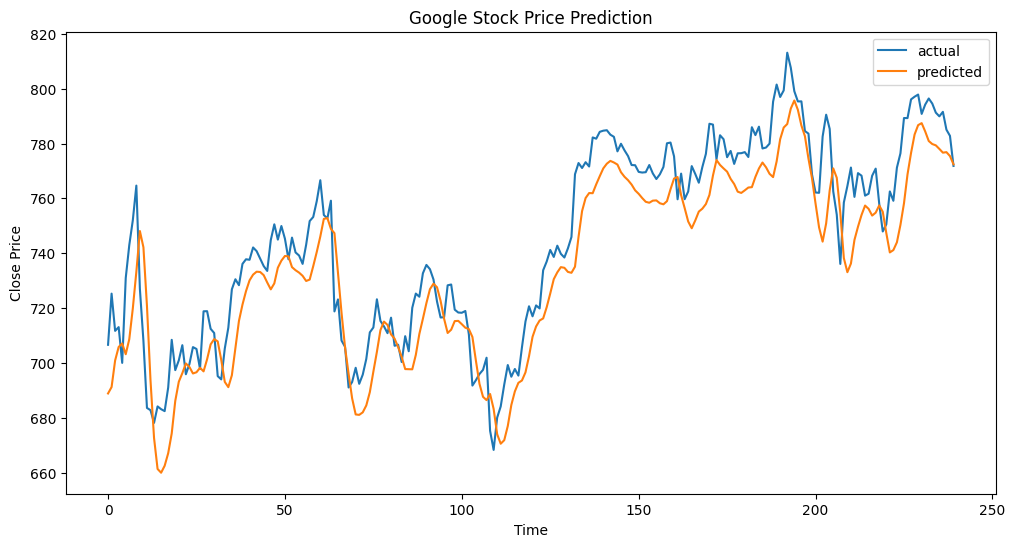

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='actual')
plt.plot(predicted_values, label='predicted')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [16]:
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2 Score: ', r2)

RMSE:  15.550725963213509
MAE:  13.028113850911456
R2 Score:  0.7974756737916288
